## Task 1

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sklearn as sk
import math

In [29]:
df = pd.read_csv("train.csv", header=0)
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [30]:
numEntries = df.shape[0]

#Missing Value Percentages
(df.isna().sum() / numEntries)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Anything used as an Identifier will not be useful for our data model since it will not have any correlation to whether or not the passenger survived, so we can remove any identifying information
We will remove:
* All columns missing over half of their values
* Any columns that are used as identifiers
* Any empty rows

This includes:
*   PassengerId
*   Name
*   Ticket
*   Cabin

We can also encode our features such as Embarked and Sex so they can be more easily processed


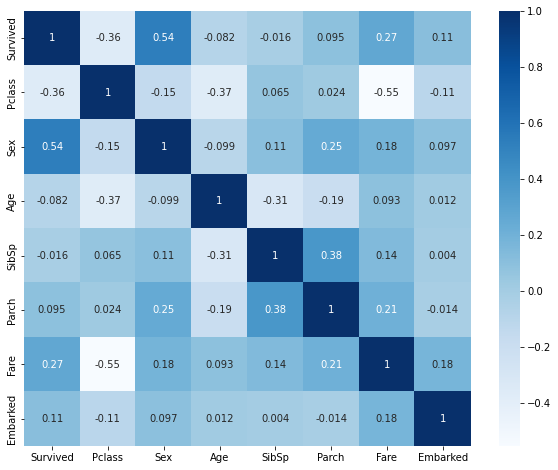

In [31]:
df_cp = df.copy()

#drop identifying and empty columns
del df_cp['PassengerId']
del df_cp['Name']
del df_cp['Ticket']
del df_cp['Cabin']

#drop remaining empty rows
df_cp = df_cp.dropna()
df_cp.isnull().sum()

#Encode Gender
df_cp['Sex'] = df_cp['Sex'].map({'male':0, 'female':1})
df_cp['Sex'] = df_cp['Sex'].astype(str).astype(int)

#Encode Embarked
df_cp['Embarked'] = df_cp['Embarked'].map({'S':1,'C':2,'Q':3})
df_cp['Embarked'] = df_cp['Embarked'].astype(str).astype(int)

df_cp

import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(data = df_cp.corr(), annot = True, cmap = 'Blues')
plt.show()

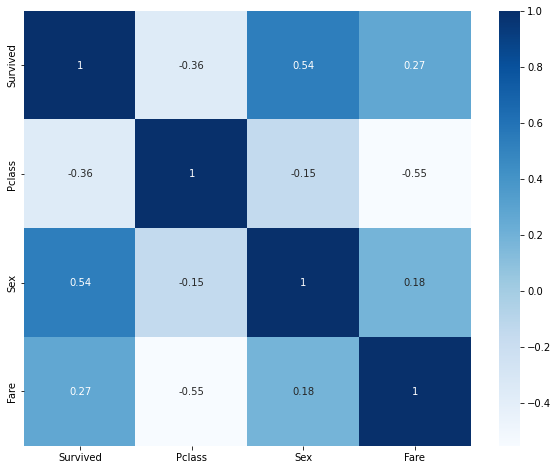

In [32]:
del df_cp['Age']
del df_cp['SibSp']
del df_cp['Parch']
del df_cp['Embarked']
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(data = df_cp.corr(), annot = True, cmap = 'Blues')
plt.show()

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

X = df_cp.copy()
del X['Survived']
y = df_cp['Survived']

# ----------------------- Decision Tree Classifier--------------------------

udtc = DecisionTreeClassifier(random_state=42)
udtc.fit(X,y)
udtc_scores = cross_val_score(udtc, X, y, cv=5, scoring="accuracy")
print(udtc_scores)
print("Unmodified tree: %f accuracy with standard deviation of %f\n" % (udtc_scores.mean(), udtc_scores.std()))

dtc = DecisionTreeClassifier(random_state=42)
dt_grid = {'criterion' : ['gini', 'entropy'],
              'max_depth': range(1,10),
              'min_samples_split' : range(1,10),
              'min_samples_leaf' : range(1,5)}

# Perform GridSearchCV on the training data using the defined parameters
# Display the best parameter combination found and the resulting scores on crossfold validation
dgrid = GridSearchCV(dtc, dt_grid, refit=True, scoring='accuracy', n_jobs=-1)
dgrid.fit(X,y)
print(dgrid.best_params_)
dtc_scores = cross_val_score(dgrid, X, y, cv=5, scoring="accuracy")
print(dtc_scores)
print("Parameter tuned tree: %f accuracy with standard deviation of %f\n" % (dtc_scores.mean(), dtc_scores.std()))

# ----------------------- Random Forest Classifier--------------------------
urfc = RandomForestClassifier(random_state=42)
urfc.fit(X,y)
urfc_scores = cross_val_score(urfc, X, y, cv=5, scoring="accuracy")
print(urfc_scores)
print("Unmodified forest: %f accuracy with standard deviation of %f\n" % (urfc_scores.mean(), urfc_scores.std()))

# Define parameter grid for search
# Note: this is not the first grid iteration
# search grid was refined after multiple runs
rfc = RandomForestClassifier(random_state=42)
rf_grid = {'criterion' : ['gini', 'entropy'],
              'n_estimators': [50, 100, 150]}

# Perform GridSearchCV on the training data using the defined parameters
# Display the best parameter combination found and the resulting scores on crossfold validation
rgrid = GridSearchCV(rfc, rf_grid, refit=True, scoring='accuracy', n_jobs=-1)
rgrid.fit(X,y)
print(rgrid.best_params_)

rfc_scores = cross_val_score(rgrid, X, y, cv=5, scoring="accuracy")
print(rfc_scores)
print("Parameter tuned forest: %f accuracy with standard deviation of %f" % (rfc_scores.mean(), rfc_scores.std()))

[0.6993007  0.8041958  0.84507042 0.76760563 0.83802817]
Unmodified tree: 0.790840 accuracy with standard deviation of 0.053414

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
[0.65734266 0.8041958  0.8028169  0.76056338 0.81690141]
Parameter tuned tree: 0.768364 accuracy with standard deviation of 0.058674

[0.69230769 0.7972028  0.83802817 0.76056338 0.84507042]
Unmodified forest: 0.786634 accuracy with standard deviation of 0.056116

{'criterion': 'gini', 'n_estimators': 100}
[0.66433566 0.79020979 0.83802817 0.76760563 0.84507042]
Parameter tuned forest: 0.781050 accuracy with standard deviation of 0.065164


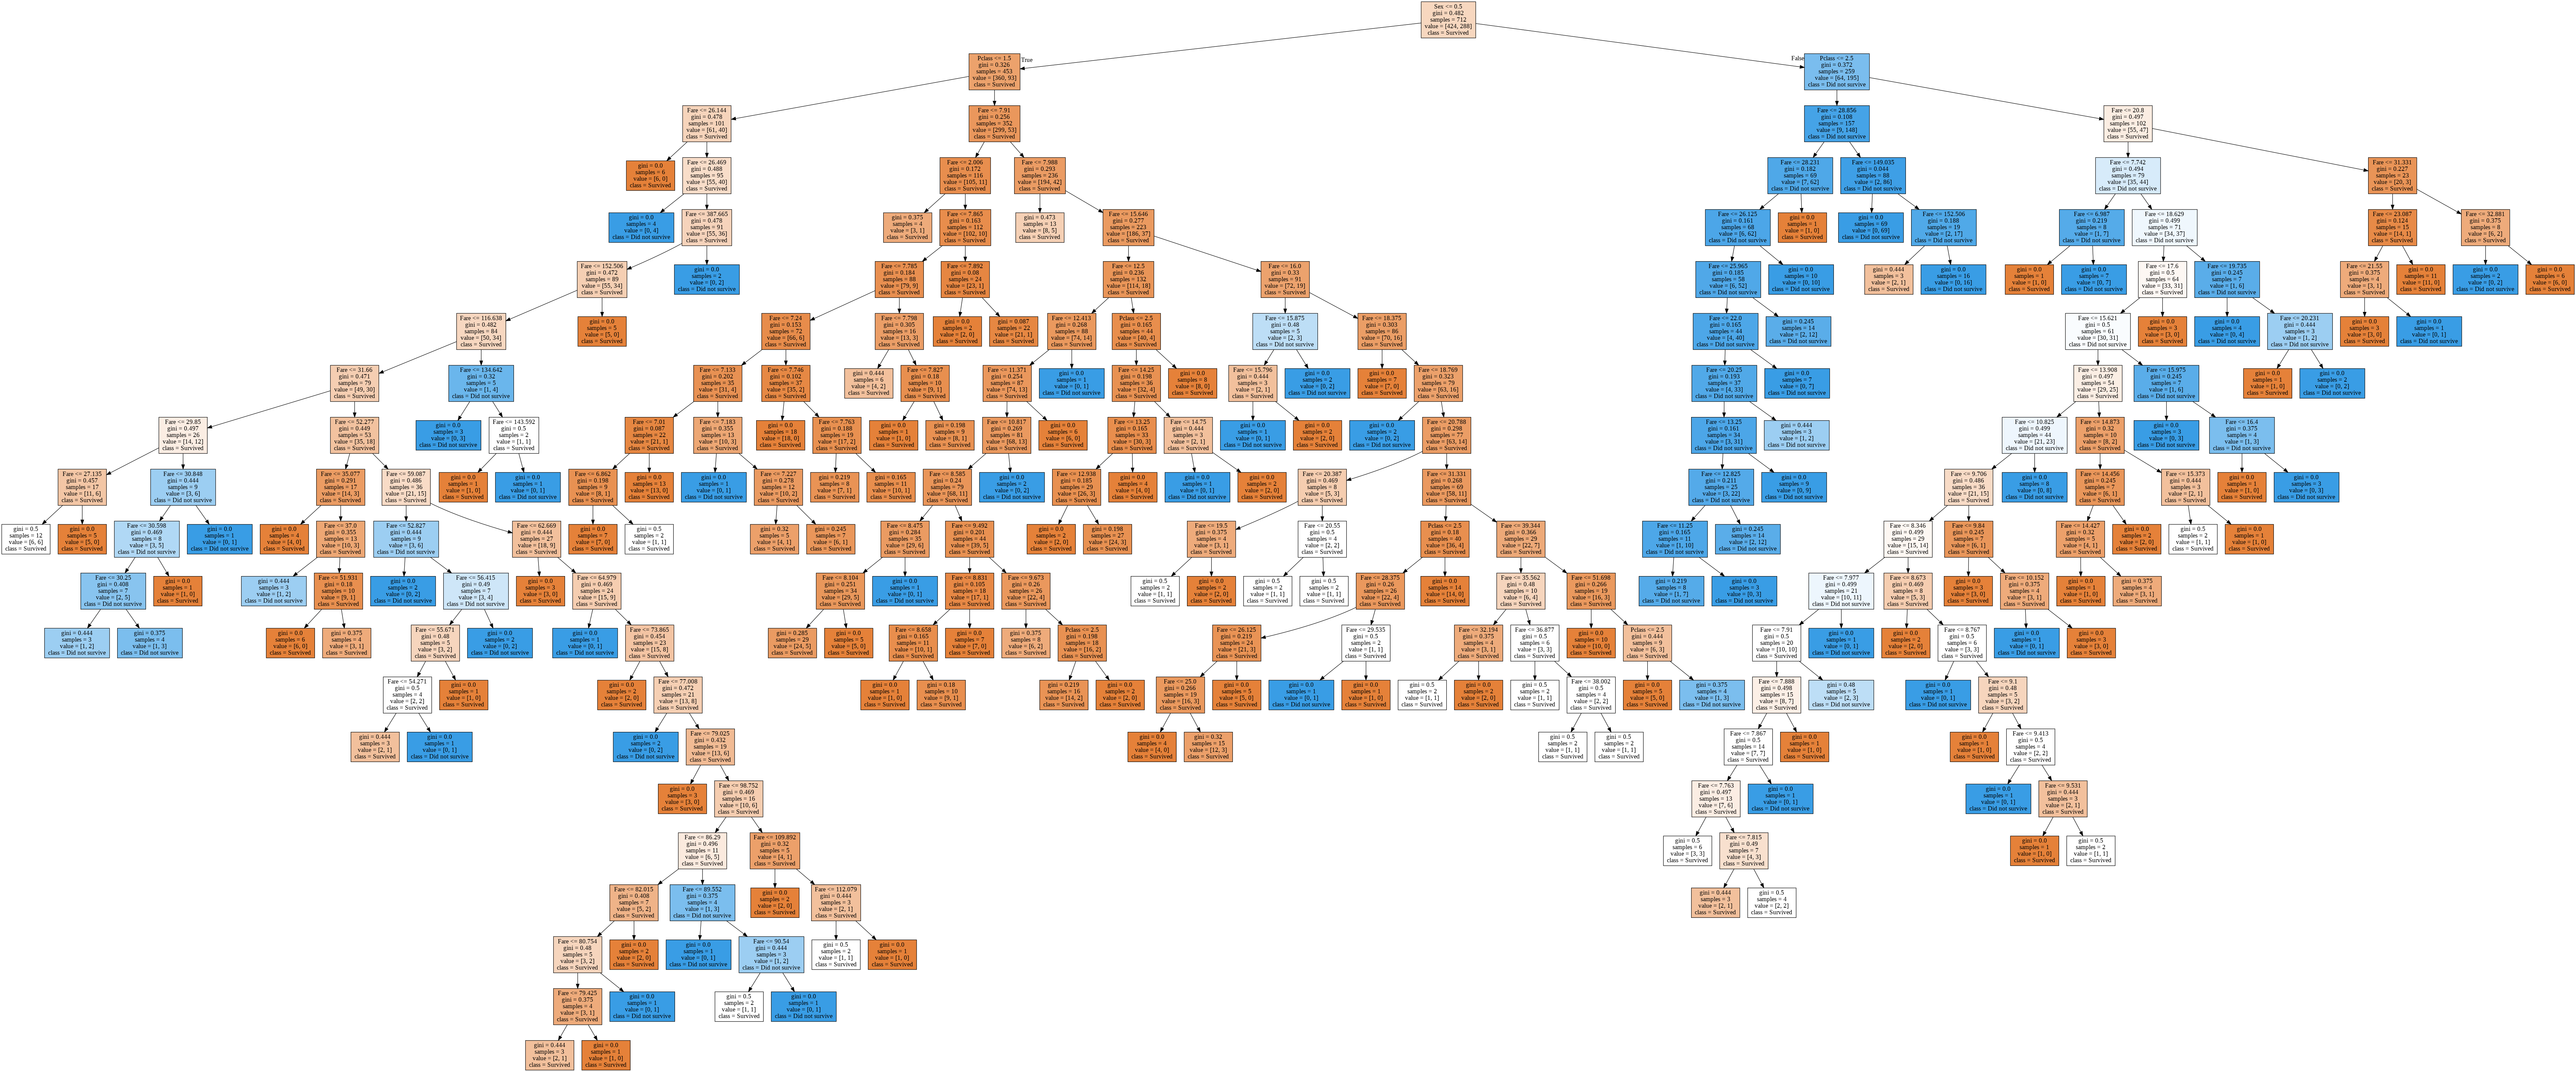

In [47]:
import graphviz
from sklearn import tree
from matplotlib import pyplot as plt
fn=['Pclass','Sex', 'Fare']
cn=['Survived', 'Did not survive'] 
dot_data = tree.export_graphviz(udtc,
                                feature_names=fn, 
                                class_names=cn,
                                filled=True)

graph = graphviz.Source(dot_data, format="png")
png_bytes = graph.pipe(format='png')
with open('./dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)